# Test to repliacate real images


In [6]:
import tifffile as tiff
from helpersGeneration import *
from helpersPlot import *


In [7]:

# Load the .tif file
image_3d = tiff.imread('real-data/70_01_7.tif')

print(image_3d.shape)  # (slices, height, width) or sometimes (height, width) if it's 2D

(1000, 170, 512)


In [8]:
#play_video(image_3d[:100], figsize=(24,8))

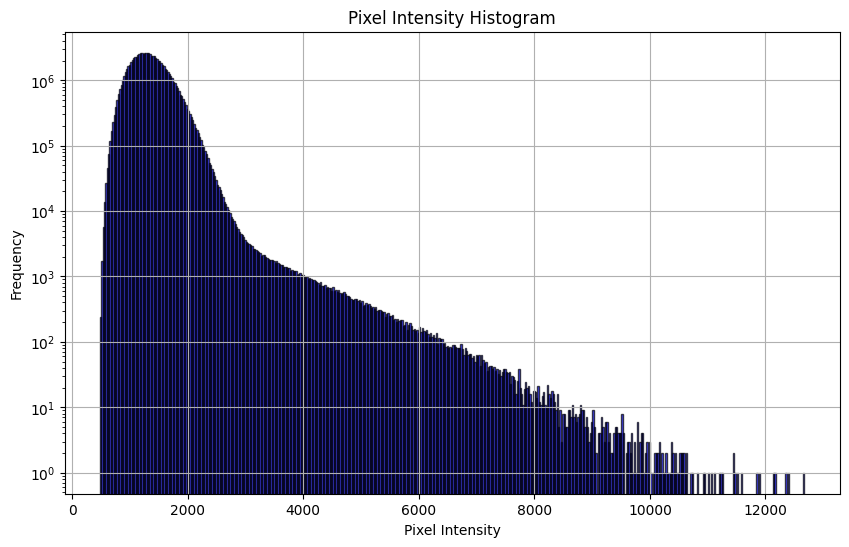

In [9]:
# Flatten all pixel values into a 1D array
pixel_values = image_3d.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=512, color='blue', alpha=0.7, edgecolor='black')
plt.yscale('log')  # <-- This makes the y-axis logarithmic
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
background_vid = image_3d[:100,:50,:100]
print(background_vid.shape)
play_video(background_vid, figsize=(15,8))

(100, 50, 100)
vmin: 536 vmax: 3591 mean: 1430.35


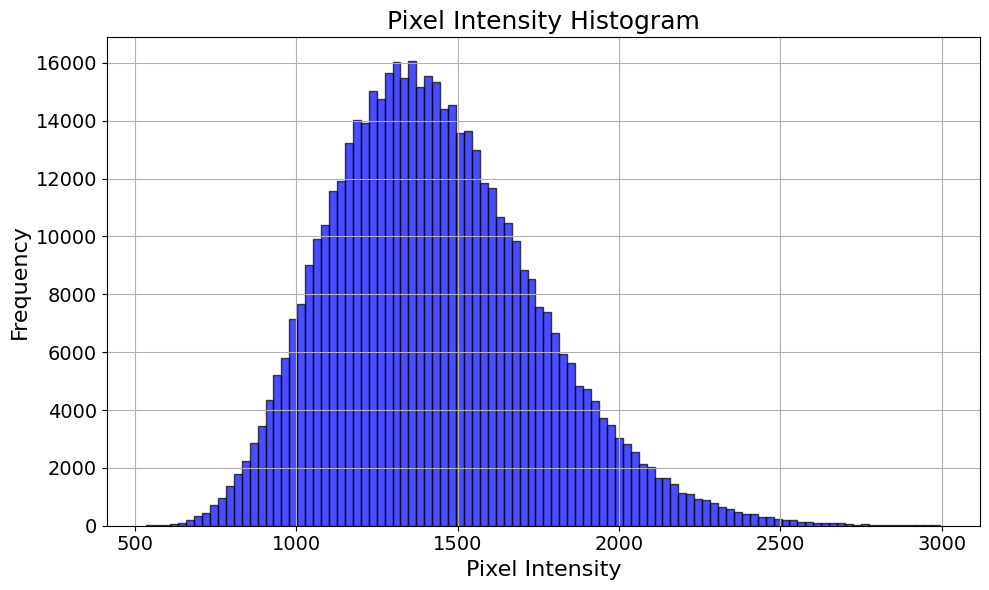

In [16]:
# Flatten all pixel values into a 1D array
pixel_values_back = background_vid.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(pixel_values_back[pixel_values_back < 3000], bins=100, color='blue', alpha=0.7, edgecolor='black')

plt.title('Pixel Intensity Histogram', fontsize=18)
plt.xlabel('Pixel Intensity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

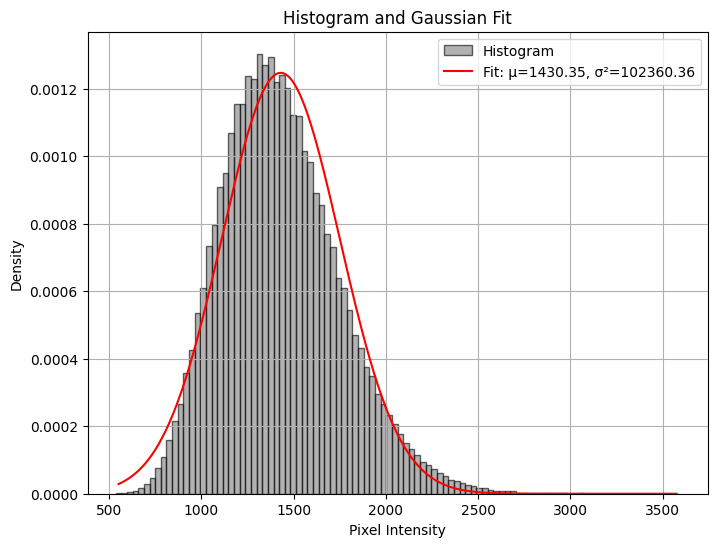

In [12]:
import scipy.stats as stats
counts, bin_edges = np.histogram(pixel_values_back, bins=512)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Estimate mean
mean_est = np.sum(counts * bin_centers) / np.sum(counts)

# Estimate variance
var_est = np.sum(counts * (bin_centers - mean_est)**2) / np.sum(counts)

mu, std = stats.norm.fit(pixel_values_back)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assume your flat patch
# your_flat_patch = noisy_patch.flatten()

# Create histogram
counts, bin_edges = np.histogram(pixel_values_back, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit Gaussian
mu, std = stats.norm.fit(pixel_values_back)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(pixel_values_back, bins=100, density=True, alpha=0.6, color='gray', edgecolor='black', label='Histogram')

# Plot fitted Gaussian
x = np.linspace(bin_centers.min(), bin_centers.max(), 500)
pdf = stats.norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ²={std**2:.2f}')

plt.title('Histogram and Gaussian Fit')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
image_dict = {
    "particle_intensity": [
        0,
        0,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 1,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": 50,
    "upsampling_factor": 1,
    "background_intensity": [
        mu,
        std,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 5,
    "trajectory_unit" : 100
}
nFrames = 100

traj = np.zeros((1,nFrames,2))
gen_vid = trajectories_to_video(traj,1,center=True,image_props=image_dict)

play_video(gen_vid[0], figsize=(8,8), no_borders=True)


TypeError: play_video() got an unexpected keyword argument 'no_borders'

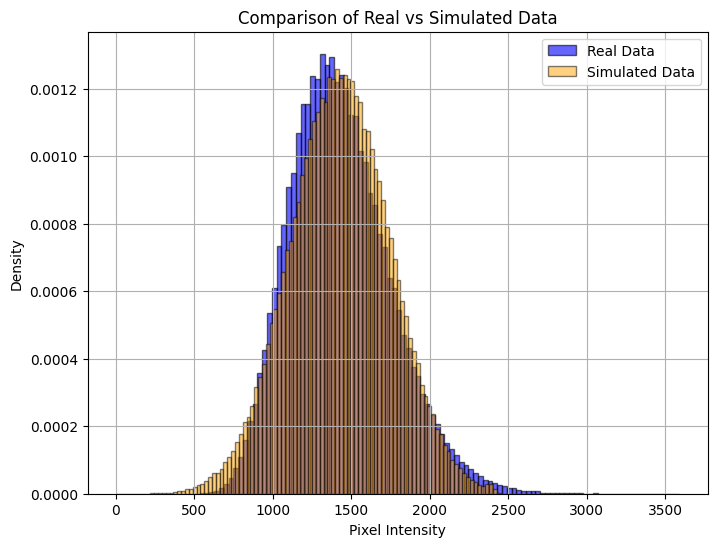

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Let's say:
# real_data = your flattened real noisy patch
# simulated_data = your flattened simulated noisy patch

# Example: (you should already have them)
real_data = pixel_values_back
simulated_data = gen_vid[0].flatten()

# Create figure
plt.figure(figsize=(8, 6))

# Plot real data histogram
plt.hist(real_data, bins=100, density=True, alpha=0.6, color='blue', label='Real Data', edgecolor='black')

# Plot simulated data histogram
plt.hist(simulated_data, bins=100, density=True, alpha=0.5, color='orange', label='Simulated Data', edgecolor='black')

# Labels and title
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Comparison of Real vs Simulated Data')
plt.legend()
plt.grid(True)

plt.show()


Mean of skewed distribution: 1393.44
Std of skewed distribution: 300.02
2.360140197486089 1083.103632291298 472.1691872588681
0 1393.440112725451 300.0205911823647
0 1430.354826 319.93806396318297


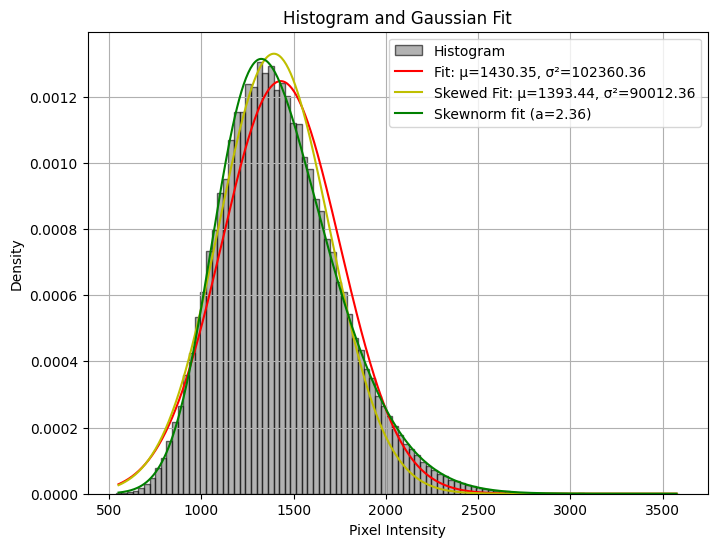

In [ ]:
from scipy.stats import skewnorm, poisson

x = np.linspace(bin_centers.min(), bin_centers.max(), 500)


a, loc, scale = skewnorm.fit(pixel_values_back)

# Create a skewnorm object
skew_dist = skewnorm(a, loc, scale)

# Compute the PDF values
pdf = skew_dist.pdf(x)

# Find the x corresponding to the maximum of the PDF
mean_skewed = x[np.argmax(pdf)]
# move it slightly up:
mean_skewed = mean_skewed * 1.05

# The std of the underlying Gaussian can be approximated as follows:
# We compute where the PDF is close to 1/sqrt(2) of its maximum (for normal distribution)
half_max = np.max(pdf) / np.sqrt(2.83)
# Find the points where the PDF is at half_max
half_max_indices = np.where(pdf >= half_max)[0]
# Estimate the standard deviation using the distance between the half-max points
std_skewed = (x[half_max_indices[-1]] - x[half_max_indices[0]]) / 2.0



print(f"Mean of skewed distribution: {mean_skewed:.2f}")
print(f"Std of skewed distribution: {std_skewed:.2f}")


print(a,loc,scale)
print(0,mean_skewed,std_skewed)
print(0,mu,std)




# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(pixel_values_back, bins=100, density=True, alpha=0.6, color='gray', edgecolor='black', label='Histogram')

# Plot fitted Gaussian
pdf = stats.norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', label=f'Fit: μ={mu:.2f}, σ²={std**2:.2f}')

pdf = stats.norm.pdf(x, mean_skewed, std_skewed)
plt.plot(x, pdf, 'y-', label=f'Skewed Fit: μ={mean_skewed:.2f}, σ²={std_skewed**2:.2f}')

pdf = skewnorm.pdf(x, a, loc, scale)
plt.plot(x, pdf, 'g-', label=f'Skewnorm fit (a={a:.2f})')

plt.title('Histogram and Gaussian Fit')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Estimation of psf_size

In [ ]:
import os
import numpy as np
import tifffile as tiff

vmin, vmax = 0, 7000

# Path to the folder containing the images
folder_path = "real-data/blocks"

# Get a list of all files in the folder
file_list = sorted(os.listdir(folder_path))  # Sorted lexicographically

# Filter only files with valid image extensions and specific naming pattern
valid_extensions = (".tif")
image_files = [f for f in file_list if f.endswith(valid_extensions) and f.startswith("block-010")]
seq_idx_to_play = 0

# Initialize an empty list to hold the images
images = []

# Loop through the image files and read them
for file in image_files:
    img_path = os.path.join(folder_path, file)
    
    # Read the image using tifffile
    img = tiff.imread(img_path)
    # Add the image to the list (assuming it's already in (image_length, image_height) shape)
    images.append(img)

image_data = np.stack(images)

# Now you can use image_data with shape (n_sequences, sequence_length, image_length, image_height)
print(image_data.shape)

play_video(image_data[seq_idx_to_play], vmin=vmin, vmax=vmax)

n_sequences, sequence_length, image_length, image_height = image_data.shape
patch_size = 16

# Calculate the indices for extracting the center (for 64x64 to 16x16)
center_start = (image_length - patch_size) // 2
center_end = center_start + patch_size

# Initialize an empty array to hold the center patches
smaller_images = np.zeros((n_sequences, sequence_length, patch_size, patch_size), dtype=image_data.dtype)

# Loop through the sequences and extract the center patches
for seq_idx in range(n_sequences):
    for frame_idx in range(sequence_length):
        image = image_data[seq_idx, frame_idx].copy()
        # Extract the center patch (16x16) from the image
        smaller_images[seq_idx, frame_idx] = image[center_start:center_end, center_start:center_end]



play_video(smaller_images[seq_idx_to_play])

(56, 16, 64, 64)
vmin: 0 vmax: 7000 mean: 1247.48


vmin: 570 vmax: 4063 mean: 1346.21


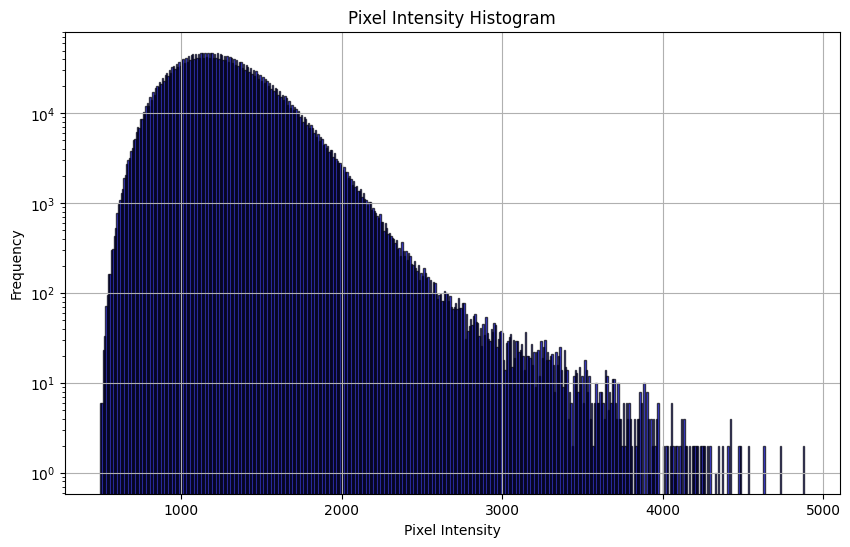

In [ ]:
imgs_p = image_data.flatten()
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(imgs_p, bins=512, color='blue', alpha=0.7, edgecolor='black')
plt.yscale('log')  # <-- This makes the y-axis logarithmic
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

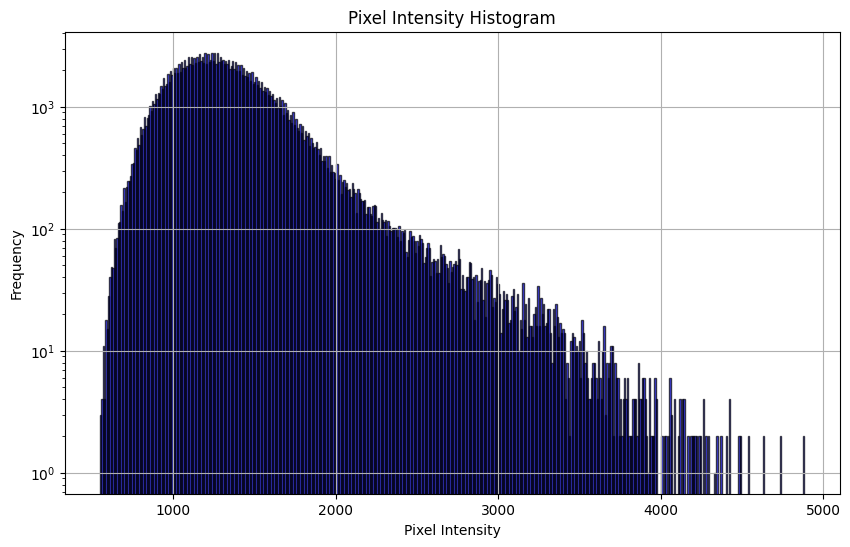

In [ ]:
imgs_p = smaller_images.flatten()
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(imgs_p, bins=512, color='blue', alpha=0.7, edgecolor='black')
plt.yscale('log')  # <-- This makes the y-axis logarithmic
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

In [ ]:
import numpy as np

def average_of_top_percent(array, percentage=10):
    """
    Computes the average of the top `percentage`% maximum values in the array.
    
    Parameters:
    ----------
    array : ndarray
        Input array (could be 1D, 2D, or any N-dimensional).
    percentage : float, optional
        The percentage of the highest values to average. Default is 10%.
    
    Returns:
    -------
    float
        The average of the top `percentage`% maximum values.
    """
    # Flatten the array to make it easier to work with
    flattened_array = array.flatten()
    
    # Number of values to select (top 10%)
    num_values = int(len(flattened_array) * (percentage / 100))
    
    # Sort the array in descending order
    sorted_values = np.sort(flattened_array)[::-1]
    
    # Select the top `num_values` values
    top_values = sorted_values[:num_values]
    
    # Compute and return the average
    return np.mean(top_values)

# Example usage
percentage = 0.5
max_intensity = average_of_top_percent(smaller_images, percentage=percentage)
print(f"Average of the top {percentage}% maximum values: {max_intensity}")


Average of the top 0.5% maximum values: 3472.412739965096


In [ ]:
nPosPerFrame = 10
D = 50000
dt = 0.1


traj = brownian_motion(1,16,nPosPerFrame,D,dt,True)

image_dict = {
    "particle_intensity": [
        max_intensity - mean_skewed,
        500,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 1.5,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": 64,
    "upsampling_factor": 5,
    "background_intensity": [
        mean_skewed,
        std_skewed,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 0.1,
    "trajectory_unit" : 1
}
nFrames = 100

gen_vid = trajectories_to_video(traj,nPosPerFrame,center=False,image_props=image_dict)

play_video(gen_vid[0], vmin=vmin, vmax=vmax)
play_video(image_data[seq_idx_to_play], vmin=vmin, vmax=vmax)


vmin: 0 vmax: 7000 mean: 1394.20


vmin: 0 vmax: 7000 mean: 1247.48


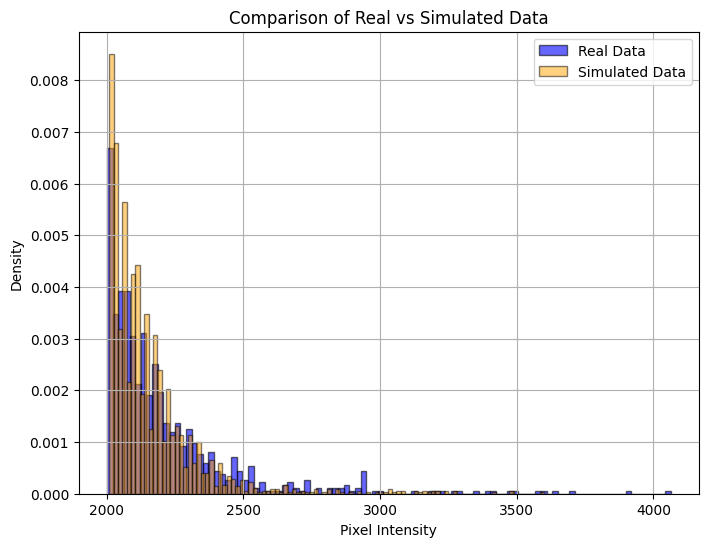

210.4814814814815 261.39592986243485
159.96744 183.75677


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Let's say:
# real_data = your flattened real noisy patch
# simulated_data = your flattened simulated noisy patch

# Example: (you should already have them)
real_data = image_data[seq_idx_to_play].flatten()
simulated_data = gen_vid[0].flatten()

# Create figure
plt.figure(figsize=(8, 6))
x = 2000
# Plot real data histogram
plt.hist(real_data[real_data > x], bins=100, density=True, alpha=0.6, color='blue', label='Real Data', edgecolor='black')

# Plot simulated data histogram
plt.hist(simulated_data[simulated_data > x], bins=100, density=True, alpha=0.5, color='orange', label='Simulated Data', edgecolor='black')

# Labels and title
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Comparison of Real vs Simulated Data')
plt.legend()
plt.grid(True)
plt.show()



print(np.mean((real_data[real_data > x]-x)), np.sqrt(np.var((real_data[real_data > x]-x))))
print(np.mean((simulated_data[simulated_data > x])-x), np.sqrt(np.var((simulated_data[simulated_data > x]-x))))



In [ ]:
def trajectories_to_videoTest(
    trajectories,
    nPosPerFrame,
    center = False,
    image_props={},
    use_multiprocessing = False,
):
    
    N,T,_ = trajectories.shape

# Invert the y axis, for video creation purposes where y-axis is inverted
    trajectories[:, :, 1] *= -1


    if(T % nPosPerFrame != 0):
        raise Exception("T is not divisble by posPerFrame")

    nFrames = T // nPosPerFrame

    _image_dict = {
        "particle_intensity": [
            500,
            20,
        ],  # Mean and standard deviation of the particle intensity
        "NA": 1.46,  # Numerical aperture
        "wavelength": 500e-9,  # Wavelength
        "psf_division_factor": 1, 
        "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
        "output_size": 32,
        "upsampling_factor": 5,
        "background_intensity": [
            100,
            10,
        ],  # Standard deviation of background intensity within a video
        "poisson_noise": 1,
        "trajectory_unit" : 100
    }

    # Update the dictionaries with the user-defined values
    _image_dict.update(image_props)
    resolution =_image_dict["resolution"]
    traj_unit = _image_dict["trajectory_unit"]
    
    if(traj_unit !=-1 ):
        trajectories = trajectories * traj_unit* 1e-9 / resolution

    output_size = _image_dict["output_size"]
    upsampling_factor = _image_dict["upsampling_factor"]
    psf_div_factor = _image_dict["psf_division_factor"]
    
    # Psf is computed as wavelenght/2NA according to:
    #https://www.sciencedirect.com/science/article/pii/S0005272819301380?via%3Dihub
    fwhm_psf = _image_dict["wavelength"] / 2 * _image_dict["NA"] / psf_div_factor

    
    gaussian_sigma = upsampling_factor/ resolution * fwhm_psf/2.355
    poisson_noise = _image_dict["poisson_noise"]
    
    out_videos = np.zeros((N,nFrames,output_size,output_size),np.float32)
    out_videos_Poisson = np.zeros((N,nFrames,output_size,output_size),np.float32)

    particle_mean, particle_std = _image_dict["particle_intensity"][0],_image_dict["particle_intensity"][1]
    background_mean, background_std = _image_dict["background_intensity"][0],_image_dict["background_intensity"][1]
    
    for n in range(N):
        trajectory_to_videoTest(out_videos[n,:],out_videos_Poisson[n,:],trajectories[n,:],nFrames,output_size,upsampling_factor,nPosPerFrame,
                                                gaussian_sigma,particle_mean,particle_std,background_mean,background_std, poisson_noise,center)
        
    return out_videos, out_videos_Poisson


def trajectory_to_videoTest(out_video,out_videoPoisson,trajectory,nFrames, output_size, upsampling_factor, nPosPerFrame,gaussian_sigma,particle_mean,particle_std,background_mean,background_std, poisson_noise, center):
    """Helper function of function above, all arguments documented above"""
    for f in range(nFrames):
        frame_hr = np.zeros(( output_size*upsampling_factor, output_size*upsampling_factor),np.float32)
        frame_lr = np.zeros((output_size, output_size),np.float32)

        start = f*nPosPerFrame
        end = (f+1)*nPosPerFrame
        trajectory_segment = (trajectory[start:end,:] - np.mean(trajectory[start:end,:],axis=0) if center else trajectory[start:end,:]) 
        xtraj = trajectory_segment[:,0]  * upsampling_factor
        ytraj = trajectory_segment[:,1] * upsampling_factor

        

        # Generate frame, convolution, resampling, noise
        for p in range(nPosPerFrame):
            if(particle_mean >0.0001 and particle_std > 0.0001):
                spot_intensity = np.random.normal(particle_mean/nPosPerFrame,particle_std/nPosPerFrame)
                frame_spot = gaussian_2d(xtraj[p], ytraj[p], gaussian_sigma, output_size*upsampling_factor, spot_intensity)

                # gaussian_2d maximum is not always the wanted one because of some misplaced pixels. 
                # We can force the peak of the gaussian to have the right intensity
                spot_max = np.max(frame_spot)
                if(spot_max < 0.00001):
                    print("Particle Left the image")
                frame_hr += spot_intensity/spot_max * frame_spot
        
        frame_lr = block_reduce(frame_hr, block_size=upsampling_factor, func=np.mean)
        # Add Gaussian noise to background intensity across the image
        frame_lr += np.clip(np.random.normal(background_mean, background_std, frame_lr.shape), 
                                    0, background_mean + 3 * background_std)

        frame_lr_poisson = np.random.poisson(frame_lr * poisson_noise) / poisson_noise

        out_video[f,:] = frame_lr
        out_videoPoisson[f,:] = frame_lr_poisson

    return


In [ ]:
nPosPerFrame = 10
D = 50000
dt = 0.1

traj = brownian_motion(1,16,nPosPerFrame,D,dt,True)

image_dict = {
    "particle_intensity": [
        max_intensity - mean_skewed,
        500,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 1.5,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": 7,
    "upsampling_factor": 5,
    "background_intensity": [
        mean_skewed,
        std_skewed,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 1,
    "trajectory_unit" : 1
}
nFrames = 100

gen_vid, gen_vidPoisson = trajectories_to_videoTest(traj,nPosPerFrame,center=True,image_props=image_dict)

play_video(gen_vid[0], vmin=vmin, vmax=vmax)
play_video(gen_vidPoisson[0], vmin=vmin, vmax=vmax)


vmin: 0 vmax: 7000 mean: 1676.98


vmin: 0 vmax: 7000 mean: 1676.93


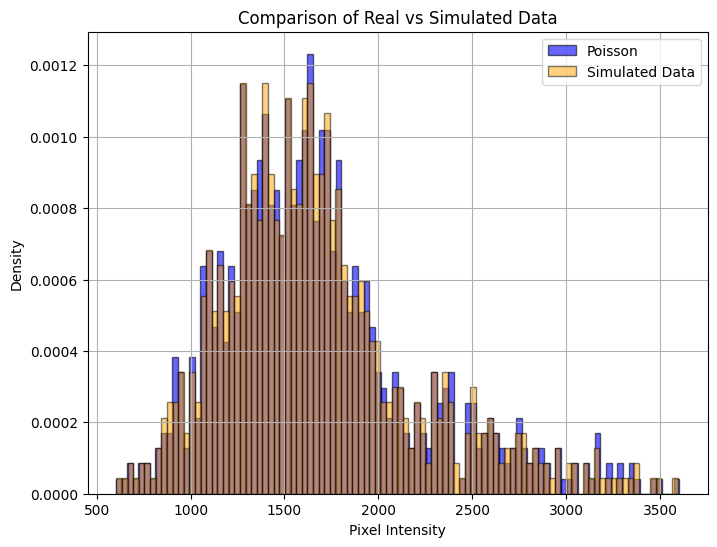

1676.9296 523.4544
1676.9791 523.3893


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Let's say:
# real_data = your flattened real noisy patch
# simulated_data = your flattened simulated noisy patch

# Example: (you should already have them)
simulated_data_poisson = gen_vidPoisson[0].flatten()
simulated_data = gen_vid[0].flatten()

# Create figure
plt.figure(figsize=(8, 6))
x = 0
# Plot real data histogram
plt.hist(simulated_data_poisson[simulated_data_poisson > x], bins=100, density=True, alpha=0.6, color='blue', label='Poisson', edgecolor='black')

# Plot simulated data histogram
plt.hist(simulated_data[simulated_data > x], bins=100, density=True, alpha=0.5, color='orange', label='Simulated Data', edgecolor='black')

# Labels and title
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Comparison of Real vs Simulated Data')
plt.legend()
plt.grid(True)
plt.show()


print(np.mean((simulated_data_poisson[simulated_data_poisson > x]-x)), np.sqrt(np.var((simulated_data_poisson[simulated_data_poisson > x]-x))))
print(np.mean((simulated_data[simulated_data > x])-x), np.sqrt(np.var((simulated_data[simulated_data > x]-x))))



In [ ]:
import numpy as np 
print(np.random.poisson(100.0, 100) * 10)
print(np.random.poisson(1000.0, 100))
print(np.random.poisson(1000000.0, 100)/1000)

[1050  950  890 1040 1110 1120 1000 1030  900 1060 1130 1060 1110  950
  990  970 1030 1010 1120 1190 1020 1140 1160  950  910 1000 1020 1010
 1040 1110 1160 1180 1070 1090 1030 1020 1040  850  940 1040 1070  930
  800 1000 1030  990 1240  930 1140  920 1030  870 1030  960 1000  980
  940  750 1100 1010  890 1010  920  950 1200  860  780 1120  900 1060
  900 1060  990  930 1000  880  820 1010  840 1050 1150  730  960 1190
 1080 1090  990 1080  830  860 1050 1020 1040 1200  980 1040  910 1050
 1070 1070]
[1005  991 1028  961  942  945 1051 1001  952 1003 1011  924 1017 1028
 1036  985  969  991 1001 1026  982  987  986 1008 1021 1026 1037  984
  948 1008 1077  971  965  957 1001  971 1017 1053 1011  963 1031 1035
 1044  964  995  963 1028 1067 1019 1026  982 1048 1000 1037  994  959
 1008  967 1010 1030 1015 1029  994 1005  994  994  955  947 1055 1031
  993  980 1012 1027  997 1004 1017 1019  969 1034  969  948  981  998
  975  988  998 1013 1002  966 1004  971 1004 1001  985 1012  978